# Lab 01: Trực quan hoá dữ liệu với Python
---
### Lớp: Trực quan hoá dữ liệu CQ2021/21
### Thông tin nhóm

| STT   |     Họ và Tên     |  MSSV |
|---------|:--------------|:---------|
| 1       | Nguyễn Chí Công         |21120418|
| 2       | Lương Thành Đạt          |21120428|
| 3       | Ngô Tuấn Đạt           | 21120430        |
| 4       | Lê Phan Xuân Dũng            | 21120435        |
| 5 | Châu Quý Dương | 21120436|

# Phần thực hành

## A. Thu thập dữ liệu

### 1. Ngữ cảnh chọn chủ đề

Các thành viên trong nhóm đều hứng thú với việc kinh doanh và quản lý doanh thu ở các cơ sở kinh doanh... Vì thế nhóm đã tiến hành tìm kiếm các tập dữ liệu phù hợp, và quyết định chọn bộ dữ liệu gồm các thông tin liên quan đến việc kinh doanh của 1 nhà hàng.

### 2. Nguồn dữ liệu

[Bộ dữ liệu](https://www.kaggle.com/datasets/mrsimple07/restaurants-revenue-prediction) được lấy từ trang Kaggle - trang web đăng tải các dataset được công khai để người học rèn luyện các kỹ năng về mảng Khoa học dữ liệu.

Đây là bộ dữ liệu mô phỏng, được thiết kế ra nhằm giúp người học luyện tập về các kỹ năng như trực quan hoá, hay áp dụng các mô hình học máy để dự đoán.

Mặc dù sử dụng dữ liệu được mô phỏng (không thực sự có ý nghĩa về mặt thực tế), tuy nhiên thông qua các biểu đồ, các phân tích trong bài làm, ta có thể rút ra được những kinh nghiệm, bài học (như trong ngữ cảnh dataset này là về kinh doanh) để áp dụng sau này.

## B. Khám phá dữ liệu

In [1]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Đọc dữ liệu

In [2]:
import os
print(os.getcwd())

e:\Junior\Semester 2\Trực quan hoá dữ liệu\TH-lab01-group


In [3]:
df = pd.read_csv("Restaurant_revenue.csv")
df.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121


In [4]:
df.info

<bound method DataFrame.info of      Number_of_Customers  Menu_Price  Marketing_Spend Cuisine_Type  \
0                     61   43.117635        12.663793     Japanese   
1                     24   40.020077         4.577892      Italian   
2                     81   41.981485         4.652911     Japanese   
3                     70   43.005307         4.416053      Italian   
4                     30   17.456199         3.475052      Italian   
..                   ...         ...              ...          ...   
995                   73   41.307842        12.122931     Japanese   
996                   31   20.615496         5.822885      Mexican   
997                   69   17.110656         4.141898     Japanese   
998                   73   37.664722         3.046556     Japanese   
999                   81   34.722067        17.989104      Italian   

     Average_Customer_Spending  Promotions  Reviews  Monthly_Revenue  
0                    36.236133           0       45     

**Nhận xét:** Bộ dữ liệu có `1000 dòng` và `8 cột`

### 2. Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?
**Nhận xét:**
Tập dữ liệu này cung cấp phân tích về các yếu tố ảnh hưởng đến hiệu suất của nhà hàng.
Mỗi dòng là thông tin của một nhà hàng tập trung vào các khía cạnh như số lượng khách hàng, giá cả, chi phí và doanh thu trong 1 tháng.

=> Không tồn tại vấn đề các dòng có ý nghĩa khác nhau.

### 3. Mỗi cột có ý nghĩa gì?
|STT|Tên thuộc tính|Ý nghĩa|
| :--| :-- | :-- |
|1|Number_of_Customers|Số lượng khách hàng đến nhà hàng|
|2|Menu_Price|Giá trung bình các món ăn trong thực đơn của nhà hàng|
|3|Marketing_Spend|Chi phí trả cho việc marketing|
|4|Cuisine_Type|Loại ẩm thực nhà hàng phục vụ|
|5|Average_Customer_Spending|Trung bình tiền 1 khách hàng bỏ ra cho nhà hàng|
|6|Promotions|Số lần khuyến mãi của nhà hàng|
|7|Reviews|Số lượt review về nhà hàng|
|8|Monthly_Revenue|Doanh thu trung bình hàng tháng|

### 4. Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp hay không?

#### Kiểu dữ liệu mỗi cột

In [5]:
col_dtype = df.dtypes
col_dtype

Number_of_Customers            int64
Menu_Price                   float64
Marketing_Spend              float64
Cuisine_Type                  object
Average_Customer_Spending    float64
Promotions                     int64
Reviews                        int64
Monthly_Revenue              float64
dtype: object

**Nhận xét:**
- Cột dữ liệu dạng số gồm: Number_of_Customers, Menu_Price, Marketing_Spend, Average_Customer_Spending,	Promotions, Reviews, Monthly_Revenue
- Cột dữ liệu dạng phân loại: Cuisine_Type

#### Phân loại kiểu dữ liệu

In [6]:
cat_columns  = df.select_dtypes(['object']).columns
num_columns  = df.select_dtypes(['number']).columns
print(cat_columns)
print(num_columns)

Index(['Cuisine_Type'], dtype='object')
Index(['Number_of_Customers', 'Menu_Price', 'Marketing_Spend',
       'Average_Customer_Spending', 'Promotions', 'Reviews',
       'Monthly_Revenue'],
      dtype='object')


### 5. Sự phân bố của các giá trị có dữ liệu dạng số

In [7]:
df[num_columns].head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,36.236133,0,45,350.912040
1,24,40.020077,4.577892,17.952562,0,36,221.319091
2,81,41.981485,4.652911,22.600420,1,91,326.529763
3,70,43.005307,4.416053,18.984098,1,59,348.190573
4,30,17.456199,3.475052,12.766143,1,30,185.009121


Với mỗi cột có dữ liệu dạng số, sử dụng thống kê mô tả để tính toán các giá trị sau:
    <li>Tỉ lệ (từ 0 đến 100) của các giá trị bị thiếu (missing_values)
    <li>Giá trị nhỏ nhất
    <li>Giá trị lower quartile (phân vị 25)
    <li>Giá trị median (phân vị 50)
    <li>Giá trị upper quartile (phân vị 75)
    <li>Giá trị lớn nhất

In [8]:
def missing_ratio(s):
    return (s.isna().mean()*100).round(1)
def median(df):
    return df.median()
def lower_quartile(df):
    return df.quantile(0.25).round(1)
def upper_quartile(df):
    return df.quantile(0.75).round(1)

In [9]:
num_columns_info = df[num_columns].agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
num_columns_info

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
missing_ratio,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
min,10.0,10.009501,0.003768,10.037177,0.0,0.0,-28.977809
lower_quartile,30.0,20.400000,4.700000,19.600000,0.0,24.0,197.100000
median,54.0,30.860614,10.092047,29.251365,0.0,50.0,270.213964
upper_quartile,74.0,39.800000,15.000000,39.600000,1.0,76.0,343.400000
max,99.0,49.974140,19.994276,49.900725,1.0,99.0,563.381332


**Nhận xét:** Missing ratio của các cột đều bằng `0` nên không cần phải bỏ cột nào.

### 6. Sự phân bố của các giá trị có dữ liệu không phải dạng số

In [10]:
df[cat_columns].head()

,Cuisine_Type
0,Japanese
1,Italian
2,Japanese
3,Italian
4,Italian


Với mỗi cột có dữ liệu không phải dạng số, ta thực hiện tính toán các giá trị sau:
    <li>Tỉ lệ % (từ 0 đến 100) các giá trị bị thiếu (missing_ratio).
    <li>Số lượng các giá trị khác nhau (không xét giá trị thiếu) (n_values).
    <li>Tỉ lệ % (từ 0 đến 100) của mỗi giá trị được sắp xếp giảm dần (không xét giá trị thiếu, tỉ lệ là tỉ lệ so với số lượng các giá trị không thiếu). Các tỉ lệ này được lưu vào một dictionary cho mỗi thuộc tính, key là giá trị, value là tỉ lệ % (value_ratios).

In [11]:
def num_values(s):
    return s.unique()
def value_ratios(s)->dict:
    value_counts = (s.value_counts(normalize=True)*100).round(1)
    return value_counts.to_dict()

In [12]:
cat_columns_info = df[cat_columns].agg([missing_ratio, num_values, value_ratios])
cat_columns_info

,Cuisine_Type
missing_ratio,0.0
num_values,"[Japanese, Italian, American, Mexican]"
value_ratios,"{'Japanese': 26.2, 'American': 25.6, 'Mexican'..."


**Nhận xét:** Missing ratio của cột bằng `0` nên không cần phải bỏ.

## C. Khám phá mối quan hệ trong dữ liệu

### Biểu đồ 1

**Tiêu đề:** Khám phá sự tương quan và mối liên hệ giữa các biến.

**Loại biểu đồ:** Heat map.

**Lý do lựa chọn:**
Dùng để thể hiện một cách trực quan về mối liên hệ giữa các biến với nhau. Trong đó, các ô dữ liệu thể hiện mức độ tương quan giữa hai cột tương ứng thông qua giá trị và màu sắc trên đó.

**Trực quan hóa:**

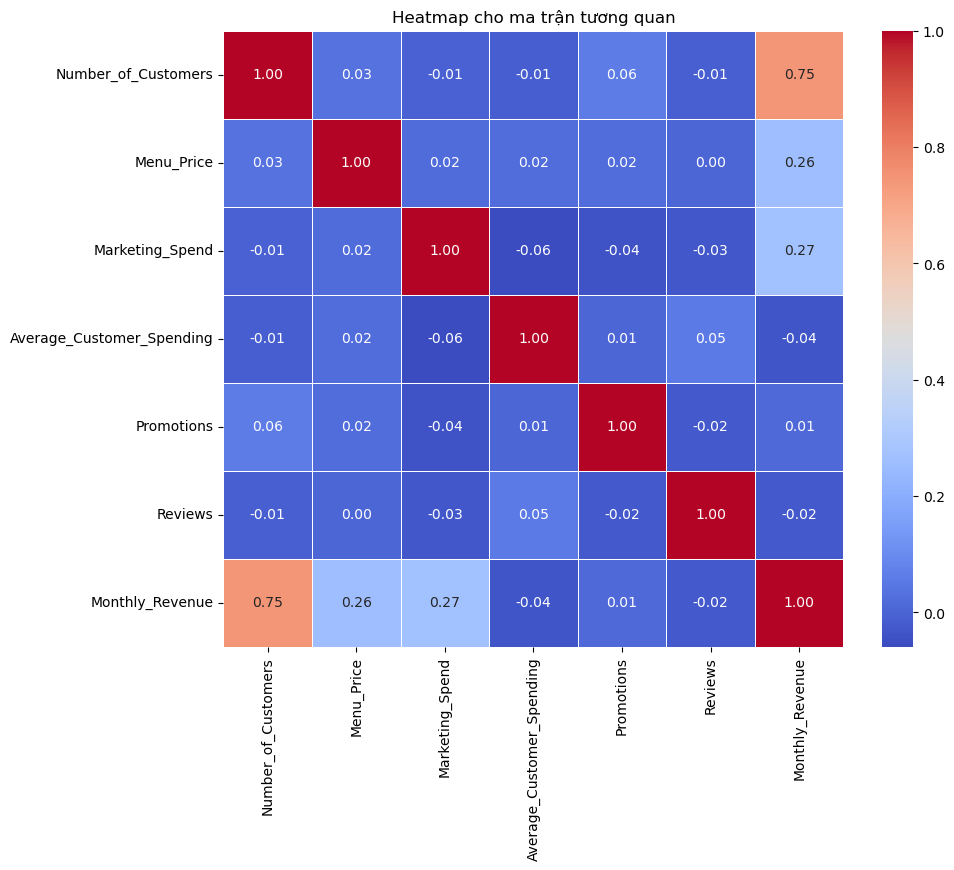

In [13]:
correlation_matrix = df.drop(columns='Cuisine_Type').corr()
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap cho ma trận tương quan')
plt.show()

**Nhận xét:**
- Với các gam màu nóng, màu càng đậm thì chứng tỏ hai biến có tương quan dương với nhau; và ngược lại, màu càng "lạnh", nghiêng về phía xanh biển nhiều hơn thì chứng tỏ chúng có tương quan âm. Màu trung tính (màu trắng) chỉ ra rằng giữa chúng ít có sự tương quan với nhau.
- Nhìn vào biểu đồ, ta thấy giữa `Monthy_Revenue` và `Number_of_Customers` có mối tương quan (dương) khá chặt chẽ (0.75), nghĩa là khi số lượng khách hàng tăng lên, doanh thu hàng tháng cũng có xu hướng tăng lên.
- `Marketing_Spend` có tương quan nhẹ dương với `Monthly_Revenue` (0.27), đề xuất rằng việc chi tiêu cho hoạt động tiếp thị có thể có ảnh hưởng tích cực đến doanh thu.

### Biểu đồ 2

**Tiêu đề:** Mối quan hệ giữa số lượng khách hàng và doanh thu trong từng tháng.

**Loại biểu đồ:** Scatter plot.

**Lý do lựa chọn:** Dùng để mô tả kỹ hơn tính tương quan dương giữa 2 cột `Monthy_Revenue` và `Number_of_Customers` đã nhắc tới ở biểu đồ heatmap phía trên. Đồng thời vẽ ra đường hồi quy cho thấy xu hướng của dữ liệu.

**Trực quan hóa:**

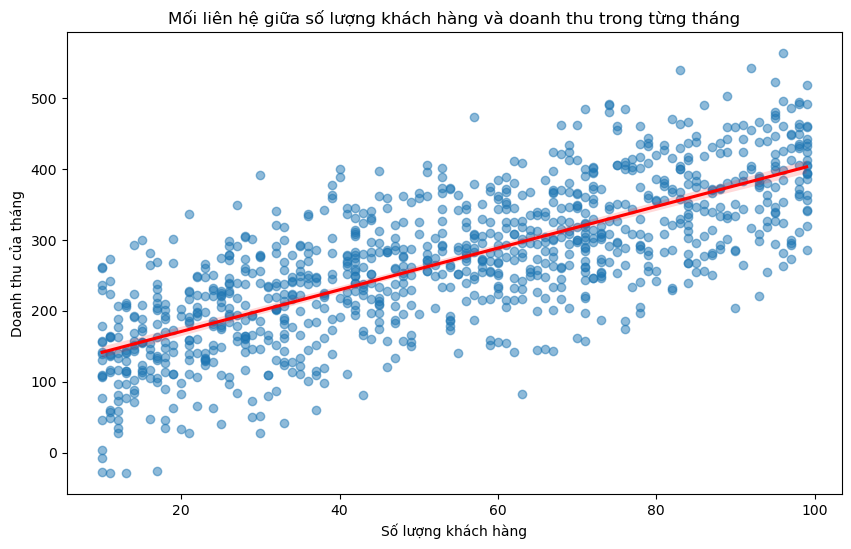

In [14]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Number_of_Customers', y='Monthly_Revenue', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Mối liên hệ giữa số lượng khách hàng và doanh thu trong từng tháng')
plt.xlabel('Số lượng khách hàng')
plt.ylabel('Doanh thu của tháng')
plt.show()

**Nhận xét:** Các điểm dữ liệu có xu hướng tập trung xung quanh đường hồi quy màu đỏ, đường này thể hiện xu hướng trung bình của tập dữ liệu, cho thấy tổng quan rằng: số lượng khách hàng trong tháng tăng lên cũng kéo theo doanh thu của tháng đó tăng lên.

### Biểu đồ 3

**Tiêu đề:** Số lượng đánh giá dựa trên kiểu ẩm thực mà nhà hàng phục vụ.

**Loại biểu đồ:** Bar chart.

**Lý do lựa chọn:**
So sánh số lượng lượt đánh giá của các kiểu ẩm thực mà nhà hàng ẩm thực, biểu đồ cột là phù hợp vì thể hiện được số lượng của mỗi thành phần trong nó.

**Trực quan hóa:**

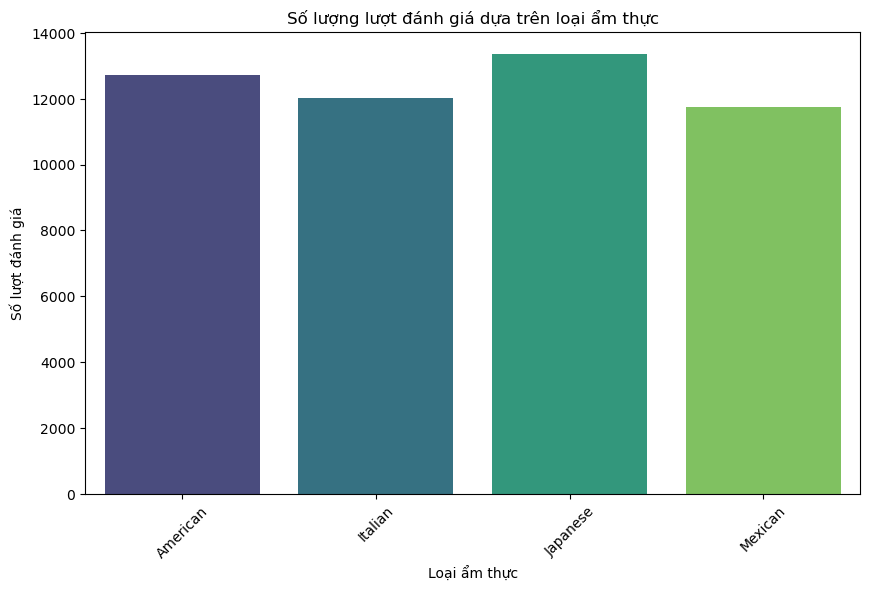

In [15]:
number_of_reviews = df.groupby('Cuisine_Type')['Reviews'].sum().reset_index()
colors = ['lightskyblue', 'dodgerblue', 'steelblue', 'paleturqouise']


plt.figure(figsize=(10, 6))
sns.barplot(data=number_of_reviews, x='Cuisine_Type', y='Reviews', palette = 'viridis')
plt.title('Số lượng lượt đánh giá dựa trên loại ẩm thực')
plt.xlabel('Loại ẩm thực')
plt.ylabel('Số lượt đánh giá')
plt.xticks(rotation=45) 
plt.show()

**Nhận xét:**
    
    
- Số lượng lượt đánh giá về kiểu ẩm thực thể hiện trên biểu đồ cho thấy sự quan tâm của khách hàng đối với mỗi loại là tương đương nhau.
    
- Số lượng lượt đánh giá về kiểu ẩm thực **Nhật Bản** là cao nhất, cho thấy khách hàng quan tâm đến kiểu ẩm thực này nhiều hơn so với 3 loại còn lại.

### Biểu đồ 4

**Tiêu đề:** Tỉ lệ kiểu ẩm thực được nhà hàng chọn để phục vụ.

**Loại biểu đồ:** Doughnut chart.

**Lý do lựa chọn:**
Biểu đồ doughnut là phù hợp nhất trong việc thể hiện tỉ lệ của dữ liệu .

**Trực quan hóa:**

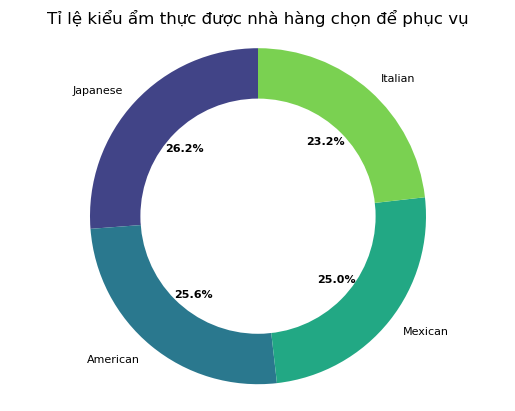

In [16]:
cuisine_counts = df['Cuisine_Type'].value_counts()

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(cuisine_counts, labels=cuisine_counts.index, autopct='%1.1f%%', wedgeprops=dict(width=0.5), startangle=90, colors=sns.color_palette('viridis', n_colors=len(cuisine_counts)))

plt.setp(texts, size=8)
plt.setp(autotexts, size=8, weight="bold")
ax.set_title('Tỉ lệ kiểu ẩm thực được nhà hàng chọn để phục vụ')

centre_circle = plt.Circle((0,0),0.7,fc='white')
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.show()

**Nhận xét:**
Mặc dù về tổng quan thì tỉ lệ phân bố các kiểu ẩm thực là tương đồng nhau, nhưng kiểu ẩm thực Nhật Bản vẫn chiếm tỉ lệ cao nhất, cho thấy nhà hàng nắm bắt được thị hiếu của khách hàng (ẩm thực Nhật Bản) để phục vụ.

### Biểu đồ 5

**Tiêu đề:** Quan sát phân bố giá của món ăn trong nhà hàng.

**Loại biểu đồ:** Histogram.

**Lý do lựa chọn:**
Biểu đồ histogram cho thấy cách thức phân phối giá trên các mức giá khác nhau. Ta có thể xác định xem phần lớn các món ăn có giá cao, thấp, hay tập trung ở mức giá trung bình. Ngoài ra biểu đồ này còn cung cấp cái nhìn về độ biến động của giá trong menu, từ đó ta có thể đánh giá xem nhà hàng có đa dạng về giá cả không.

**Trực quan hóa:**

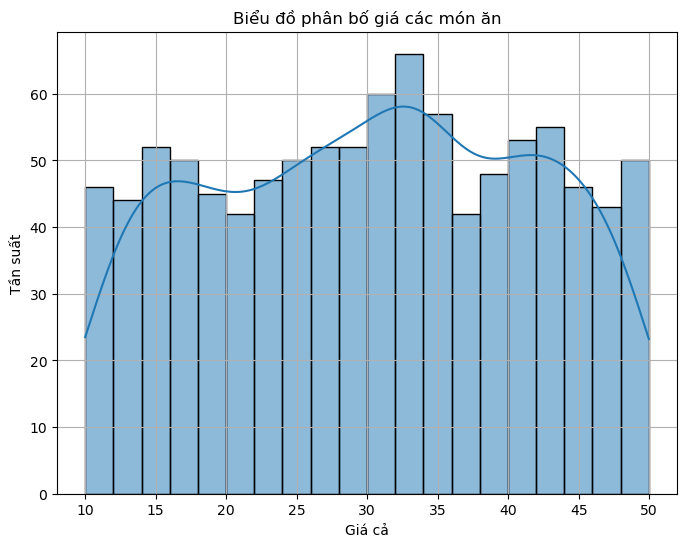

In [17]:
plt.figure(figsize=(8, 6))

sns.histplot(df['Menu_Price'], kde =True, bins = 20)
plt.title('Biểu đồ phân bố giá các món ăn')
plt.xlabel('Giá cả')
plt.ylabel('Tần suất')
plt.grid(True)
plt.show()

**Nhận xét:**
- Phần lớn giá cả của các món ăn tập trung chủ yếu trong khoảng từ 20 đến 35. Điều này cho thấy rằng nhà hàng có phân khúc giá ở mức trung bình, không quá cao cũng không quá thấp.
- Biểu đồ cho thấy có ít món ăn ở cả hai đầu phân bố giá (rất rẻ và rất đắt). Điều này có thể phản ánh chiến lược giá của nhà hàng là tập trung vào phân khúc thị trường trung bình, không tập trung vào món ăn giá thấp hoặc cao cấp.

### Biểu đồ 6

**Tiêu đề:** Doanh thu hàng tháng của từng loại hình ẩm thực.

**Loại biểu đồ:** Bar chart.

**Lý do lựa chọn:**
Biểu đồ bar chart hiển thị giá trị trung bình của doanh thu hàng tháng cho mỗi loại hình ẩm thực một cách rõ ràng, giúp chúng ta dễ dàng nhận biết sự khác biệt và thấy được xu hướng trong dữ liệu.

**Trực quan hóa:**

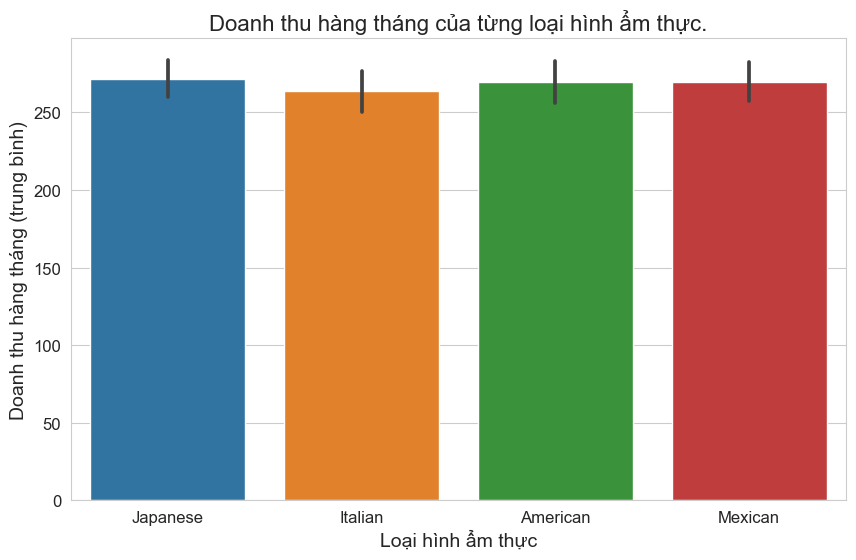

In [18]:
# Chọn style cho biểu đồ
sns.set_style("whitegrid")  # hoặc sử dụng style khác tùy thích

plt.figure(figsize=(10, 6))
sns.barplot(x='Cuisine_Type', y='Monthly_Revenue', data=df, estimator=np.mean)  # tính giá trị trung bình
plt.title('Doanh thu hàng tháng của từng loại hình ẩm thực.', fontsize=16)
plt.xlabel('Loại hình ẩm thực', fontsize=14)
plt.ylabel('Doanh thu hàng tháng (trung bình)', fontsize=14)
plt.xticks(fontsize=12)  # Cỡ chữ cho các nhãn trục x
plt.yticks(fontsize=12)  # Cỡ chữ cho các nhãn trục y
plt.show()

**Nhận xét:**
- So sánh giá trị trung bình của doanh thu hàng tháng giữa các loại hình ẩm thực khác nhau.
- Loại hình ẩm thực "Japanese" có doanh thu trung bình cao nhất, trong khi loại hình "Mexican" có doanh thu trung bình thấp nhất.
- Thể hiện một cách trực quan sự khác biệt về doanh thu hàng tháng giữa các loại hình ẩm thực, từ đó cung cấp thông tin hữu ích cho việc ra quyết định kinh doanh và chiến lược tiếp thị.

### Biểu đồ 7

**Tiêu đề:** Mối quan hệ giữa chi phí marketing và doanh thu hàng tháng.

**Loại biểu đồ:** Scatter plot.

**Lý do lựa chọn:** Thể hiện mối quan hệ giữa hai biến số, trong trường hợp này là chi phí marketing và doanh thu hàng tháng. 

**Trực quan hóa:**

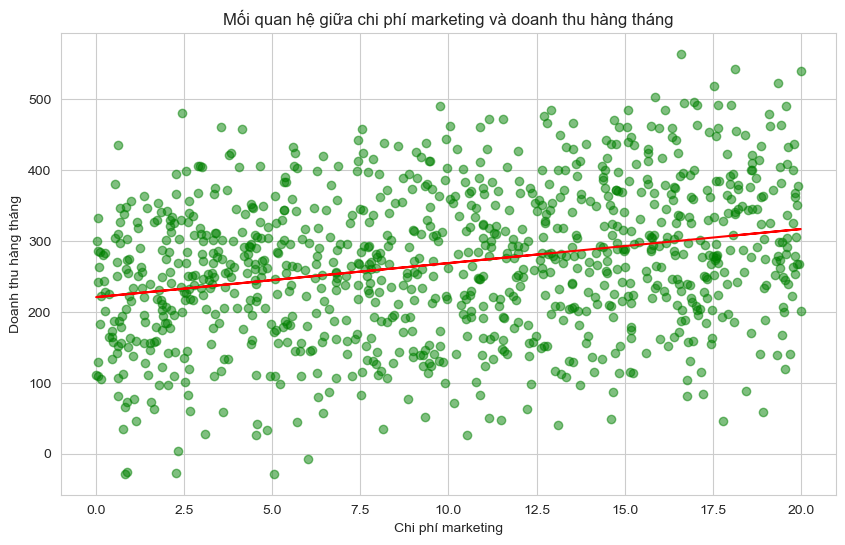

In [19]:
# Tạo biểu đồ scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Marketing_Spend'], df['Monthly_Revenue'], color='green', alpha=0.5)
plt.title('Mối quan hệ giữa chi phí marketing và doanh thu hàng tháng')
plt.xlabel('Chi phí marketing')
plt.ylabel('Doanh thu hàng tháng')
plt.grid(True)

# Tính toán đường hồi quy
m, b = np.polyfit(df['Marketing_Spend'], df['Monthly_Revenue'], 1)

# Vẽ đường hồi quy
plt.plot(df['Marketing_Spend'], m * df['Marketing_Spend'] + b, color='red')

plt.show()


**Nhận xét:**
- Có vẻ như có một mối tương quan dương giữa chi phí marketing và doanh thu hàng tháng, tức là khi chi phí marketing tăng, doanh thu cũng tăng theo.
- Dữ liệu phân bố khá đồng đều trên biểu đồ, không có sự tập trung quá lớn ở một vùng nhất định. Điều này cho thấy không có một quy luật rõ ràng về mối quan hệ giữa hai biến số, và có thể có nhiều yếu tố khác ảnh hưởng đến doanh thu.
- Có một số điểm ngoại lệ có thể được quan sát, nơi chi phí marketing tăng nhưng doanh thu không tăng tương ứng, hoặc ngược lại.

### Biểu đồ 8

**Tiêu đề:** Mối quan hệ giữa giá trung bình thực đơn và loại ẩm thực.

**Loại biểu đồ:** Violin.

**Lý do lựa chọn:** Biểu đồ violin hiển thị mật độ ước lượng của dữ liệu tại các giá trị khác nhau, cho thấy không chỉ trung tâm của dữ liệu mà còn cả độ phân tán của nó. Điều này giúp ta nhìn nhận rõ ràng sự biến động và độ lệch của dữ liệu, không chỉ là giá trị trung bình. 

**Trực quan hóa:**

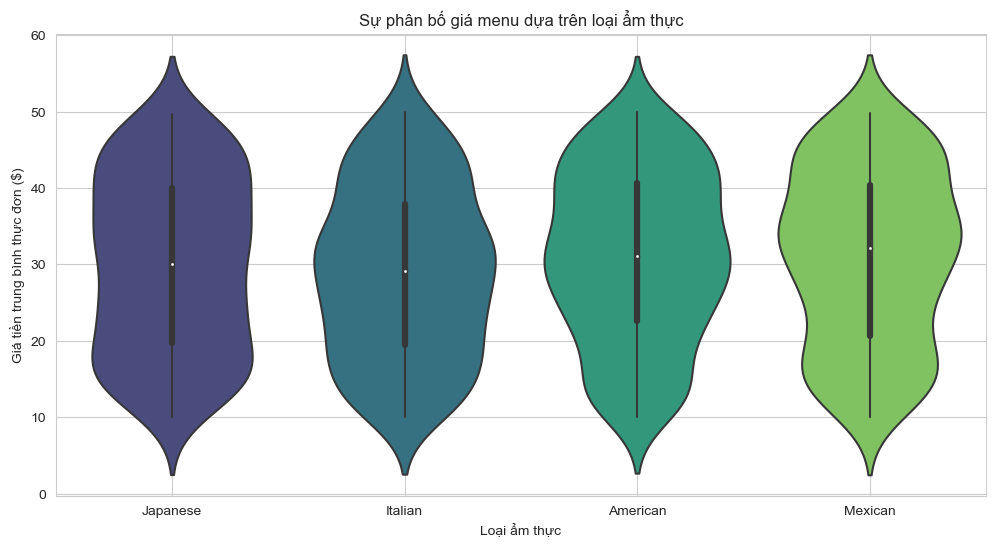

In [20]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Cuisine_Type', y='Menu_Price', data=df, palette = 'viridis')
plt.title('Sự phân bố giá menu dựa trên loại ẩm thực')
plt.xlabel('Loại ẩm thực')
plt.ylabel('Giá tiền trung bình thực đơn ($)')
plt.grid(True)
plt.show()

**Nhận xét:**
- Một số loại ẩm thực có phân phối giá rất rộng, chẳng hạn như ẩm thực Nhật Bản và Ý, điều này cho thấy sự đa dạng lớn trong giá cả, có thể phản ánh các mức độ khác nhau về chất lượng, địa điểm hoặc dịch vụ đặc biệt.
- Ẩm thực Nhật Bản là loại có "bụng" dày nhất trong biểu đồ violin, chỉ ra một khoảng giá phổ biến rộng lớn và có sự phân cấp giá cao.

### Biểu đồ 9

**Tiêu đề:** Mối quan hệ giữa số lần khuyến mãi, số lượng khách hàng và loại ẩm thực.

**Loại biểu đồ:** Cột ghép.

**Lý do lựa chọn:** Biểu đồ violin hiển thị mật độ ước lượng của dữ liệu tại các giá trị khác nhau, cho thấy không chỉ trung tâm của dữ liệu mà còn cả độ phân tán của nó. Điều này giúp ta nhìn nhận rõ ràng sự biến động và độ lệch của dữ liệu, không chỉ là giá trị trung bình. 

**Trực quan hóa:**

<Figure size 1200x800 with 0 Axes>

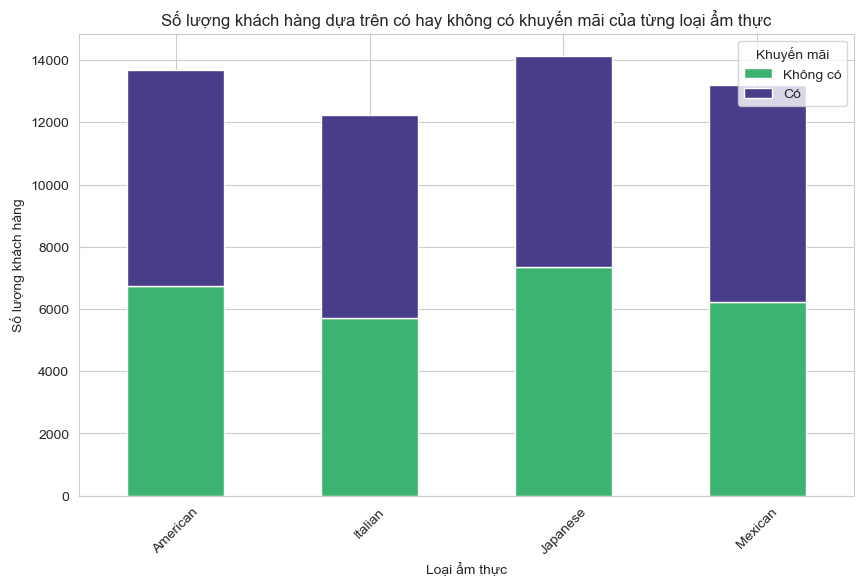

In [21]:
plt.figure(figsize=(12, 8))
stacked_data = df.groupby(['Cuisine_Type', 'Promotions'])['Number_of_Customers'].sum().unstack(fill_value=0)
stacked_data.plot(kind='bar', stacked=True, color=['mediumseagreen', 'darkslateblue'], figsize=(10, 6))

plt.title('Số lượng khách hàng dựa trên có hay không có khuyến mãi của từng loại ẩm thực')
plt.xlabel('Loại ẩm thực')
plt.ylabel('Số lượng khách hàng')
plt.xticks(rotation=45)
plt.legend(title='Khuyến mãi', labels=['Không có', 'Có'])
plt.grid(True, axis='y')
plt.show()

**Nhận xét:**
- Khuyến mãi có tác động tích cực đến lượng khách hàng đối với mỗi loại ẩm thực, ta có thể dễ dàng thấy qua các cột màu tím (có khuyến mãi) thường cao hơn so với các cột màu xanh (không có khuyến mãi).
- Qua đó ta rút ra được rằng, tập trung một chút vào việc đưa ra các chiến lược khuyến mãi hấp dẫn để thu hút khách hàng là một nước đi hay trong kinh doanh!

## D. Mô hình học máy

In [22]:
# Import một số thư viện cần thiết
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Ở đây nhóm em sẽ sử dụng một mô hình học máy đơn giản, đó là `Hồi quy tuyến tính`, nhằm dự đoán doanh thu của cửa hàng.

Mô hình **hồi quy tuyến tính** là một cách tiếp cận thống kê để mô hình hóa mối quan hệ giữa một biến phụ thuộc (thường được gọi là $Y$) và một hoặc nhiều biến độc lập (gọi là $X_i$​). Mô hình giả định rằng có một mối quan hệ tuyến tính giữa các biến, tức là biến phụ thuộc có thể được dự đoán từ một tổ hợp tuyến tính của các biến độc lập.

Phương trình cơ bản của hồi quy tuyến tính khi chỉ có một biến độc lập là: $$ Y = \beta_0 + \beta_1X + \varepsilon $$
trong đó:
- $Y$ là biến phụ thuộc.
- $X$ là biến độc lập.
- $β_0$​ là giao điểm của đường hồi quy với trục Y (còn gọi là hệ số chặn hoặc độ lệch).
- $β_1$​ là hệ số hồi quy của $X$, thể hiện mức độ thay đổi trung bình trong $Y$ khi $X$ thay đổi một đơn vị.
- $ε$ là sai số ngẫu nhiên, bao gồm tất cả các yếu tố khác không được mô hình hóa.

Trong trường hợp có nhiều hơn một biến độc lập, mô hình được mở rộng thành hồi quy tuyến tính đa biến: $$ Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n + \varepsilon $$

Trong ngữ cảnh bài toán của nhóm, đây là mô hình hồi quy tuyến tính đa biến.

### Bước 1: Chuẩn bị dữ liệu

Tách ra thành 2 tập dữ liệu: ma trận biến đặc trưng và vector biến mục tiêu

In [23]:
X = df.drop('Monthly_Revenue', axis = 1)
y = df['Monthly_Revenue']

Với cột `Cuisine_Type`, đây là cột có kiểu dữ liệu categorical, nên ta sẽ cần mã hoá chúng để chuyển về dạng số, giúp thuận tiện trong việc huấn luyện mô hình học máy.

Ở đây ta áp dụng kỹ thuật `one-hot encoding` cho cột dữ liệu.

In [24]:
X = pd.get_dummies(X, columns = ['Cuisine_Type'])
X # Đã loại bỏ cột Cuisine_Type

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Cuisine_Type_American,Cuisine_Type_Italian,Cuisine_Type_Japanese,Cuisine_Type_Mexican
0,61,43.117635,12.663793,36.236133,0,45,False,False,True,False
1,24,40.020077,4.577892,17.952562,0,36,False,True,False,False
2,81,41.981485,4.652911,22.600420,1,91,False,False,True,False
3,70,43.005307,4.416053,18.984098,1,59,False,True,False,False
4,30,17.456199,3.475052,12.766143,1,30,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
995,73,41.307842,12.122931,19.033585,1,40,False,False,True,False
996,31,20.615496,5.822885,17.040990,0,57,False,False,False,True
997,69,17.110656,4.141898,44.649315,0,55,False,False,True,False
998,73,37.664722,3.046556,27.767358,0,23,False,False,True,False


Tiếp theo, ta cần chia tập dữ liệu ra làm hai: tập huấn luyện và tập kiểm tra

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Bước 2: Huấn luyện mô hình

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Bước 3: Dự đoán

In [27]:
y_pred = model.predict(X_test)

### Bước 4: Đánh giá mô hình

Ta sẽ dùng hai chỉ số đánh giá mô hình hồi quy tuyến tính phổ biến là: `MSE` *(Mean Squared Error)* và `R-squared`

In [28]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MSE:', mse)
print('R-squared:', r2)

MSE: 3560.4388349737933
R-squared: 0.6740626407300359


**Nhận xét:** Với giá trị $R^2$ khoảng `0.674` cho thấy mô hình giải thích được khoảng 67.4% sự biến thiên của doanh thu hàng tháng từ các biến đã được sử dụng. Độ lỗi $MSE$ là khoảng `3560.43` có thể chấp nhận được, cho thấy mô hình này dự đoán chính xác giá trị mục tiêu một cách tương đối.